**Covid-19 in Italy. Hospitalizations (=ricoveri)**

**Import libraries**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from custom.plot_utils import get_xticks_labels

**Read the xlsx file provided by ISS**.

PS: install openpyxl to read the xlsx file

In [2]:
url = "https://www.epicentro.iss.it/coronavirus/open-data/covid_19-iss.xlsx"
xlsx = pd.ExcelFile(url)
print(xlsx.sheet_names)

['Nota metodologica', 'Contenuto', 'casi_prelievo_diagnosi', 'casi_inizio_sintomi', 'casi_inizio_sintomi_sint', 'casi_regioni', 'casi_provincie', 'ricoveri', 'decessi', 'sesso_eta', 'stato_clinico']


- Selected sheets: 'ricoveri' (hospitalizations)
- iss_date = last updated date
- DATARICOVERO1 = dates (set as index)
- RICOVERI = hospitalizations

In [3]:
df_cases = pd.read_excel(xlsx, sheet_name="ricoveri")
# Select the rows where date is not nan
df_cases.dropna(subset=["DATARICOVERO1"], inplace=True)
df_cases["DATARICOVERO1"] = pd.to_datetime(df_cases["DATARICOVERO1"], infer_datetime_format=True)
df_cases.set_index("DATARICOVERO1", inplace=True, drop=True)
df_cases = df_cases[:-1]
# Convert to numerical values
df_cases["RICOVERI"] = pd.to_numeric(df_cases["RICOVERI"], errors="coerce")

In [4]:
df_cases.head(2)

,iss_date,RICOVERI
DATARICOVERO1,,
2020-02-20,10/01/2022,92
2020-02-21,10/01/2022,123


**Calculate 7 day moving average**

In [5]:
df_cases["RICOVERI 7 day avg"] = df_cases["RICOVERI"].rolling(window=7, min_periods=1).mean()

**Plot new hospitalizations/7 day moving average**

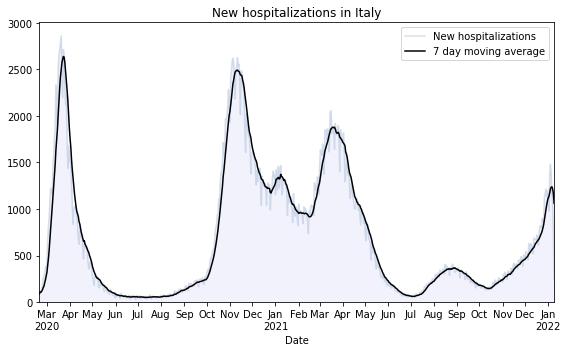

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(df_cases.index,
        df_cases["RICOVERI"],
        c="lightsteelblue",
        alpha=0.5,
        label="New hospitalizations")
ax.plot(df_cases.index,
        df_cases["RICOVERI 7 day avg"],
        c="k",
        linewidth=1.5,
        label="7 day moving average")

ax.set_title("New hospitalizations in Italy")
ax.set_xlabel("Date")

# get x ticks, labels
ticks, labels = get_xticks_labels(df_cases.index)
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
ax.legend()

ax.fill_between(x=df_cases.index, y1=df_cases["RICOVERI"], color="lavender", alpha=0.5)

ax.margins(x=0)
ax.set_ylim(0, )

fig.tight_layout()
plt.show()

**Deaths**

In [7]:
df_deaths = pd.read_excel(xlsx, sheet_name="decessi")
# Select the rows where date is not nan
df_deaths.dropna(subset=["DATA_DECESSO"], inplace=True)
df_deaths["DATA_DECESSO"] = pd.to_datetime(df_deaths["DATA_DECESSO"], infer_datetime_format=True)
df_deaths.set_index("DATA_DECESSO", inplace=True, drop=True)
df_deaths = df_deaths[:-1]
# Convert to numerical values
df_deaths["DECESSI"] = pd.to_numeric(df_deaths["DECESSI"], errors="coerce")

In [8]:
df_deaths.tail(2)

,iss_date,DECESSI
DATA_DECESSO,,
2022-01-08,10/01/2022,115.0
2022-01-09,10/01/2022,51.0


**Calculate 7 day moving average**

In [9]:
df_deaths["DECESSI 7 day avg"] = df_deaths["DECESSI"].rolling(window=7, min_periods=1).mean()

**Plot new deaths/7 day moving average**

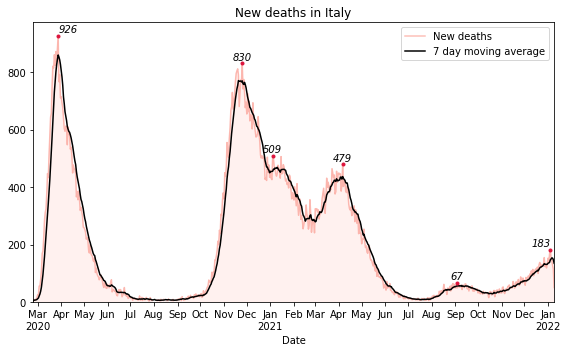

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(df_deaths.index,
        df_deaths["DECESSI"],
        c="salmon",
        alpha=0.5,
        label="New deaths")
ax.plot(df_deaths.index,
        df_deaths["DECESSI 7 day avg"],
        c="k",
        label="7 day moving average")

ax.set_title("New deaths in Italy")
ax.set_xlabel("Date")

# get x ticks, labels
ticks, labels = get_xticks_labels(df_deaths.index)
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
ax.legend()

ax.fill_between(x=df_deaths.index, y1=df_deaths["DECESSI"], color="mistyrose", alpha=0.5)

# annotate max value given the periods
periods = [(df_deaths.index[0], df_deaths.index[-1]),
           ("2020-08-01", "2021-01-01"), ("2021-01-01", "2021-03-01"),
           ("2021-03-01", "2021-07-01"), ("2021-07-01", "2021-11-01"),
           ("2021-11-01", df_deaths.index[-1])]

for period in periods:
        locked = df_deaths.loc[period[0]:period[1]]
        ymax = locked["DECESSI"].max()
        xmax = locked["DECESSI"].idxmax()
        ax.plot(xmax, ymax, marker="o", c="crimson", markersize=3.0)

        ha = "right"
        if xmax >= pd.to_datetime("2020-09-01") and xmax <= pd.to_datetime("2021-11-01"):
                ha = "center"
        elif xmax <= pd.to_datetime("2020-09-01"):
                ha="left"

        ax.text(x=xmax, y=ymax+5, s=round(ymax), 
                va="bottom", ha=ha, color="k",
                fontstyle = 'italic')

ax.margins(x=0)
ax.set_ylim(0, )

fig.tight_layout()
plt.show()